In [34]:
#
#import all the necessary dependencies
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read the Image, Grayscale, and Blur

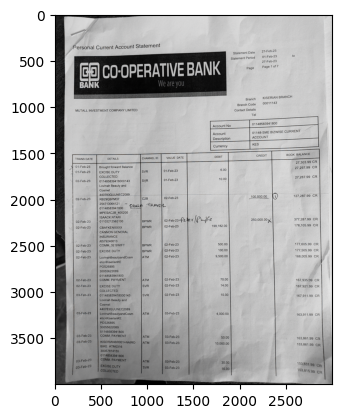

In [35]:
img= cv2.imread('./src/statements.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BAYER_BG2BGR))

## 2. Apply filters and find edges for localization

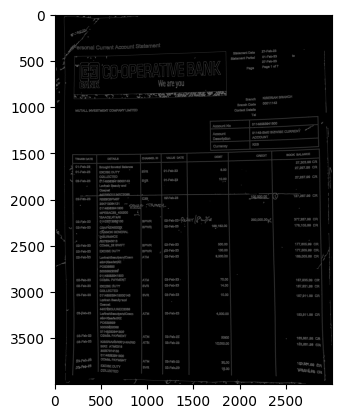

In [36]:
bfilter= cv2.bilateralFilter(gray, 5,9,9) ## reduce the noise in the image
edged= cv2.Canny(bfilter, 30, 250) # Detect edges
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [37]:
keypoints= cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [38]:
location= None
for contour in contours:
    approx= cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location=approx
        break

In [39]:
location

array([[[2840, 1106]],

       [[1672, 1155]],

       [[1676, 1475]],

       [[2845, 1436]]], dtype=int32)

In [40]:
mask = np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location],0,255,-1)
new_image= cv2.bitwise_and(img,img, mask=mask)

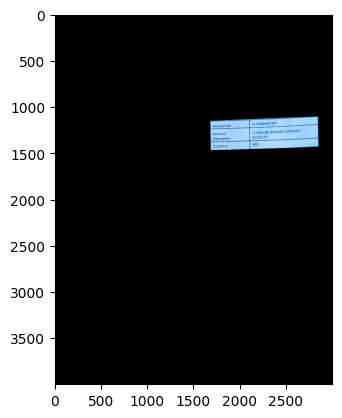

In [41]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

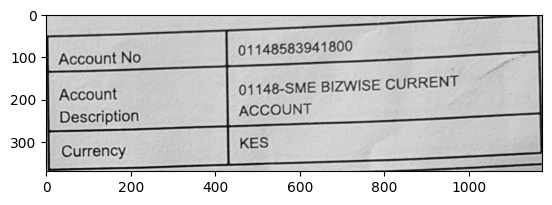

In [42]:
#
#Crop out the image section
(x,y)= np.where(mask==255)
(x1,y1)= (np.min(x), np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image= gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4.Read the text within the image using Easy OCR

In [43]:
reader= easyocr.Reader(['en'])
result= reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[451, 69], [497, 69], [497, 105], [451, 105]], '01', 0.9999980612455189),
 ([[486, 51], [733, 51], [733, 106], [486, 106]],
  '148583941800',
  0.9999254943477122),
 ([[27, 80], [232, 80], [232, 129], [27, 129]],
  'Account No',
  0.9993371391922564),
 ([[449, 133], [986, 133], [986, 202], [449, 202]],
  '01148-SME BIZWISE CURRENT',
  0.7934490485162052),
 ([[30, 168], [175, 168], [175, 212], [30, 212]], 'Account', 0.99999409754358),
 ([[27, 216], [226, 216], [226, 271], [27, 271]],
  'Description',
  0.806551682746203),
 ([[451, 201], [634, 201], [634, 249], [451, 249]],
  'ACCOUNT',
  0.9997908389172286),
 ([[453, 283], [531, 283], [531, 323], [453, 323]], 'KES', 0.9999452839158015),
 ([[30, 302], [193, 302], [193, 347], [30, 347]],
  'Currency',
  0.9649448750524462)]

## 5. Render Result

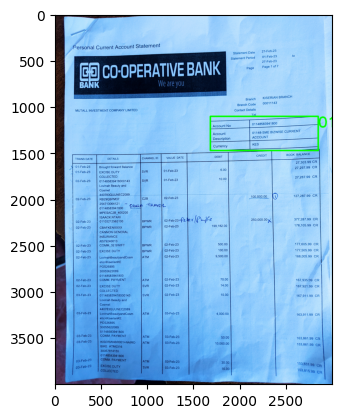

In [44]:
text= result[0][-2]
font= cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+65), fontFace= font, fontScale=5, color=(0,255,0), thickness=16, lineType=cv2.LINE_AA)
res= cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),16)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))